# **Description:**

Surprise is a very valuable tool that can be used within Python to build recommendation systems. Its documentation is quite useful and explains its various prediction algorithms’ packages. Before we start building a model, it is important to import elements of surprise that are useful for analysis, such as certain model types (SVD, KNNBasic, KNNBaseline, KNNWithMeans, and many more), Dataset and Reader objects (more on this later), accuracy scoring, and built in train-test-split, cross validation and GridSearch.



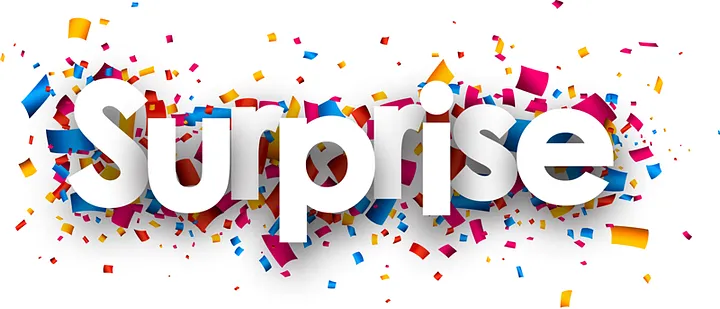

# **Installation and unzipping and importing libraries**

In [1]:
!pip install pandas matplotlib seaborn
!unzip /content/ml-100k.zip

Archive:  /content/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [6]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163746 sha256=12a6a9738d5506b86660062d35d48cf9e31ce744dfb1292810e8f7520eec758d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from surprise import Reader, Dataset, SVD
from surprise import Dataset
from surprise.model_selection import cross_validate, train_test_split , GridSearchCV
from surprise import accuracy
from surprise import SVD
from surprise import dump

# Read The data

In [3]:
path_to_datasets= "/content/ml-100k/"
# Load user data
users_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(f'{path_to_datasets}u.user', sep='|', names=users_cols, encoding='latin-1')

# Load ratings data
ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(f'{path_to_datasets}u.data', sep='\t', names=ratings_cols, encoding='latin-1')

# Load movies data
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL'] + ['genre_' + str(i) for i in range(19)]
movies = pd.read_csv(f'{path_to_datasets}u.item', sep='|', names=movies_cols, encoding='latin-1', usecols=range(24))


Lets merge Movies with Ratings

In [4]:
df = ratings.merge(movies, left_on='movie_id', right_on='movie_id', how='left')
df

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,IMDb_URL,genre_0,genre_1,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)",14-Sep-1996,NaN,http://us.imdb.com/M/title-exact?First%20Wives...,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,5,879795543,Back to the Future (1985),01-Jan-1985,NaN,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,0,...,0,0,0,0,0,0,1,0,0,0
99997,276,1090,1,874795795,Sliver (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,0,...,0,0,0,0,0,0,0,1,0,0
99998,13,225,2,882399156,101 Dalmatians (1996),27-Nov-1996,NaN,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = df[['user_id', 'title', 'rating']]
df

,user_id,title,rating
0,196,Kolya (1996),3
1,186,L.A. Confidential (1997),3
2,22,Heavyweights (1994),1
3,244,Legends of the Fall (1994),2
4,166,Jackie Brown (1997),1
...,...,...,...
99995,880,"First Wives Club, The (1996)",3
99996,716,Back to the Future (1985),5
99997,276,Sliver (1993),1
99998,13,101 Dalmatians (1996),2


Since out movies rating is on scale from 1 to 5 we put the rating scale (1,5) in the reader

In [11]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df, reader)
train, test = train_test_split(data, test_size=0.2)

The SVD model is one of the strongest recommendation systems available. SVD is a type of matrix factorization that minimizes the error between the expected and actual ratings from our original utility matrix by using gradient descent to provide predictions for users' ratings. Gradient descent therefore minimizes RMSE in the process of forecasting these new ratings.


# **model1**

In [12]:
model = SVD(n_factors=200)
model.fit(train)

In [13]:
predictions = model.test(test)
accuracy.rmse(predictions)

RMSE: 0.9412


0.9411834586916997

# **model2**

In [16]:
parameters = {'n_factors':[20,50,80],
              'reg_all':[0.04,0.06],
              'n_epochs':[10,20,30],
              'lr_all':[0.002,0.005,0.01]}
model2 = GridSearchCV(SVD,param_grid=parameters,n_jobs=-1)
model2.fit(data)
print(model2.best_score)
print(model2.best_params)

{'rmse': 0.9160602107427781, 'mae': 0.721569208331745}
{'rmse': {'n_factors': 50, 'reg_all': 0.06, 'n_epochs': 20, 'lr_all': 0.01}, 'mae': {'n_factors': 80, 'reg_all': 0.06, 'n_epochs': 30, 'lr_all': 0.01}}


Save best model

In [19]:
# Save the model to a file
model_filename = 'surprise_svd_model'
dump.dump(model_filename, predictions=None, algo=model)

# Load the saved model



In [20]:
model_filename = 'surprise_svd_model'

loaded_model = dump.load(model_filename)[1]
predictions = model.test(test)
accuracy.rmse(predictions)

RMSE: 0.9412


0.9411834586916997